## Построение графика по количесту зарегистрированных разводов за месяц с 2009 по 2021 год


Официальные данные РОССТАТ экспортированы с сайта: 
     'http://bi.gks.ru/biportal/contourbi.jsp?allsol=1&solution=Dashboard'

Импорт библиотеки pandas (для работы с табличными данными) и pyplot для построения графика

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
#  Подключаем модуль управления тиками:
import matplotlib.ticker as ticker
from sklearn.metrics import r2_score
import ml_metrics as metrics

In [88]:
!pip install ml_metrics

  Created wheel for ml-metrics: filename=ml_metrics-0.1.4-py3-none-any.whl size=7848 sha256=fc880dd077646fcc1297fc119f3eabf6d1de6cef99c030d6691d0cf02295f1dc
  Stored in directory: c:\users\admin\appdata\local\pip\cache\wheels\09\2d\e7\58a96e635aedc543a3a78ff855dc9911d98fc1640e3921c823
Successfully built ml-metrics


Загрузка в датафрейм pandas из csv 

In [121]:
df = pd.read_csv('divorce_marriage.csv', encoding='ansi')

Отображение датафрейма

In [122]:
df

,territory,id_indicator,period,territory.ccube.0,territory.ccube.1,territory.ccube.2,territory.ccube.attr.0,territory.ccube.3,territory.ccube.4,value
0,643,814,31 Jan 2009 00:00:00,Российская Федерация,NaN,NaN,1,Российская Федерация,Российская Федерация,5.44
1,643,814,28 Feb 2009 00:00:00,Российская Федерация,NaN,NaN,1,Российская Федерация,Российская Федерация,6.39
2,643,814,31 Mar 2009 00:00:00,Российская Федерация,NaN,NaN,1,Российская Федерация,Российская Федерация,6.05
3,643,814,30 Apr 2009 00:00:00,Российская Федерация,NaN,NaN,1,Российская Федерация,Российская Федерация,6.65
4,643,814,31 May 2009 00:00:00,Российская Федерация,NaN,NaN,1,Российская Федерация,Российская Федерация,6.06
...,...,...,...,...,...,...,...,...,...,...
28873,10000000,816,31 Dec 2021 00:00:00,Российская Федерация,Дальневосточный федеральный округ,Амурская область,3,Амурская область,Амурская область,5.60
28874,44000000,816,31 Dec 2021 00:00:00,Российская Федерация,Дальневосточный федеральный округ,Магаданская область,3,Магаданская область,Магаданская область,5.90
28875,64000000,816,31 Dec 2021 00:00:00,Российская Федерация,Дальневосточный федеральный округ,Сахалинская область,3,Сахалинская область,Сахалинская область,5.00
28876,99000000,816,31 Dec 2021 00:00:00,Российская Федерация,Дальневосточный федеральный округ,Еврейская автономная область,3,Еврейская автономная область,Еврейская автономная область,6.40


    - id_indicator - это id показателя (браки = 814, разводы = 816)
    - territory.ccube.(0-2) - это идентификатор уровня субъекта (0 - страна, 1 - федеральный округ, 2 - область или округ)
*В связи с этим составим датафрейм, выбрав только нужный нам субъект и показатель*

In [123]:
orel_df = df.loc[(df['territory.ccube.3'] == 'Орловская область') & (df['id_indicator'] == 814)]

Отображение нового датафрейма по бракам для Орловской области после удаления лишних колонок

In [124]:
new_df = orel_df.drop(["territory", "id_indicator", "territory.ccube.0", "territory.ccube.1", "territory.ccube.2", "territory.ccube.attr.0", "territory.ccube.3", "territory.ccube.4"], axis=1)

In [125]:
new_df.dropna()

,period,value
1584,31 Jan 2009 00:00:00,5.16
1585,28 Feb 2009 00:00:00,6.84
1586,31 Mar 2009 00:00:00,5.61
1587,30 Apr 2009 00:00:00,6.20
1588,31 May 2009 00:00:00,5.58
...,...,...
27950,31 Aug 2021 00:00:00,6.30
28138,30 Sep 2021 00:00:00,6.60
28326,31 Oct 2021 00:00:00,6.50
28514,30 Nov 2021 00:00:00,6.30


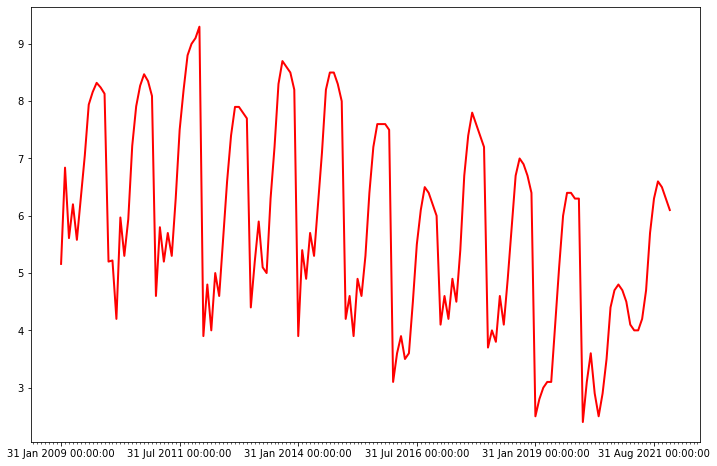

In [126]:
fig, ax = plt.subplots()

x = new_df['period']
y = new_df['value']

ax.plot(x, y, color = 'r', linewidth = 2)

#  Исправление формата подписей оси x
ax.xaxis.set_major_locator(ticker.MultipleLocator(30))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))


fig.set_figwidth(12)
fig.set_figheight(8)

plt.show()

## Построение графика автокорреляционной функции

Импорт необходимых библиотек (если нет, установить через !pip install)

In [127]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

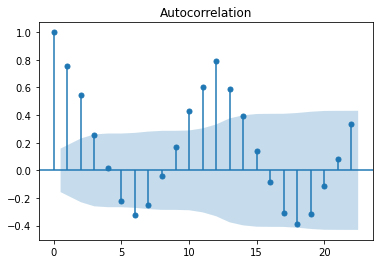

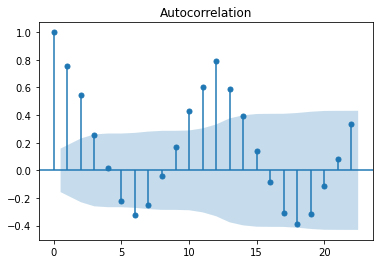

In [128]:
plot_acf(new_df['value'])

## Тест Дикки-Фуллера

In [129]:
import statsmodels.api as sm

In [130]:
test = sm.tsa.stattools.adfuller(orel_df['value'])
print('adf: ', test[0]) 
print('p-value: ', test[1])
print('Critical values: ', test[4])
if test[0]> test[4]['5%']: 
    print('ряд не стационарен')
else:
    print('ряд стационарен')

adf:  -1.6855543395519392
p-value:  0.43857026279843736
Critical values:  {'1%': -3.477261624048995, '5%': -2.8821181874544233, '10%': -2.5777431104939494}
ряд не стационарен


### Немного полезных ссылок 
https://maxdrive.kyiv.ua/dokumentacija/pochta/kak-sdelat-vremennoj-rjad-stacionarnym-python
http://distrland.blogspot.com/2020/06/python_28.html

## Приведение ряда к стационарному виду

### Первый метод

Имеем следующий датафрейм:

In [12]:
new_df

,period,value
1584,31 Jan 2009 00:00:00,5.16
1585,28 Feb 2009 00:00:00,6.84
1586,31 Mar 2009 00:00:00,5.61
1587,30 Apr 2009 00:00:00,6.20
1588,31 May 2009 00:00:00,5.58
...,...,...
27950,31 Aug 2021 00:00:00,6.30
28138,30 Sep 2021 00:00:00,6.60
28326,31 Oct 2021 00:00:00,6.50
28514,30 Nov 2021 00:00:00,6.30


Создадим из него тестовый датафрейм, с которым будем производить все преобразования:

In [13]:
stat_df = new_df

In [14]:
stat_df

,period,value
1584,31 Jan 2009 00:00:00,5.16
1585,28 Feb 2009 00:00:00,6.84
1586,31 Mar 2009 00:00:00,5.61
1587,30 Apr 2009 00:00:00,6.20
1588,31 May 2009 00:00:00,5.58
...,...,...
27950,31 Aug 2021 00:00:00,6.30
28138,30 Sep 2021 00:00:00,6.60
28326,31 Oct 2021 00:00:00,6.50
28514,30 Nov 2021 00:00:00,6.30


Импортируем библиотеку NumPy, т.к. там имеется функция логарифмирования

In [15]:
import numpy as np

Преобразования используются для стабилизации непостоянной дисперсии ряда. Общие методы преобразования включают степенное преобразование, квадратный корень и логарифмическое преобразование. В нашем случае используем логарифмирование

In [16]:
stat_df['value_log'] = np.log(stat_df['value'])

In [17]:
stat_df

,period,value,value_log
1584,31 Jan 2009 00:00:00,5.16,1.640937
1585,28 Feb 2009 00:00:00,6.84,1.922788
1586,31 Mar 2009 00:00:00,5.61,1.724551
1587,30 Apr 2009 00:00:00,6.20,1.824549
1588,31 May 2009 00:00:00,5.58,1.719189
...,...,...,...
27950,31 Aug 2021 00:00:00,6.30,1.840550
28138,30 Sep 2021 00:00:00,6.60,1.887070
28326,31 Oct 2021 00:00:00,6.50,1.871802
28514,30 Nov 2021 00:00:00,6.30,1.840550


Для того, чтобы избавиться от меняющегося среднего выполним разницу последовательных членов в ряду

In [18]:
stat_df['value_diff'] = stat_df['value_log'] - stat_df['value_log'].shift(1)

При выполнении такого преобразования первый член ряда будет неопределён. Проверим ряд на наличие пустого значения и убедимся в этом

In [19]:
stat_df.isna().sum()

period        0
value         0
value_log     0
value_diff    1
dtype: int64

Видим одно пустое значение. Удалим его из ряда для дальнейшей работы методом notnull

In [20]:
stat_df = stat_df[pd.notnull(stat_df['value_diff'])]

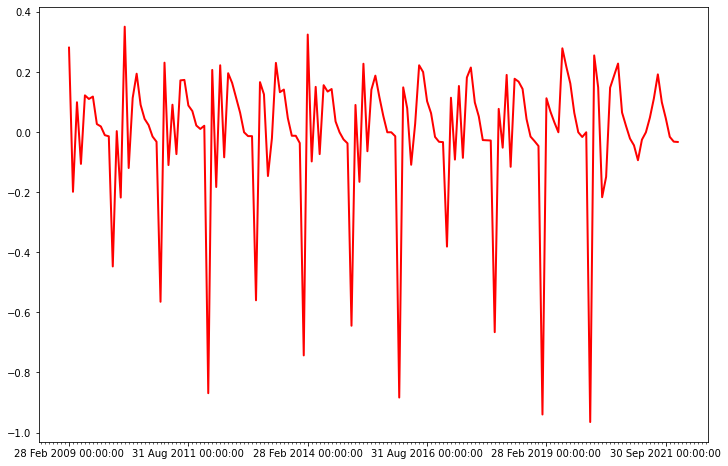

In [21]:
fig, ax = plt.subplots()

x = stat_df['period']
y = stat_df['value_diff']

ax.plot(x, y, color = 'r', linewidth = 2)

#  Исправление формата подписей оси x
ax.xaxis.set_major_locator(ticker.MultipleLocator(30))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))


fig.set_figwidth(12)
fig.set_figheight(8)

plt.show()

In [22]:
test = sm.tsa.stattools.adfuller(stat_df['value_diff'])
print('adf: ', test[0]) 
print('p-value: ', test[1])
print('Critical values: ', test[4])
if test[0]> test[4]['5%']: 
    print('ряд не стационарен')
else:
    print('ряд стационарен')

adf:  -4.059069636219816
p-value:  0.0011309083917136332
Critical values:  {'1%': -3.477261624048995, '5%': -2.8821181874544233, '10%': -2.5777431104939494}
ряд стационарен


Получили стационарный временной ряд.

### Второй метод

Во втором методе использовал только первые разности ряда (т.е. получил просто интегрированный ряд первого порядка)

Заново создадим new_df

In [23]:
new_df = orel_df.drop(["territory", "id_indicator", "territory.ccube.0", "territory.ccube.1", "territory.ccube.2", "territory.ccube.attr.0", "territory.ccube.3", "territory.ccube.4"], axis=1)

In [24]:
stat_df2 = new_df

In [25]:
stat_df2

,period,value
1584,31 Jan 2009 00:00:00,5.16
1585,28 Feb 2009 00:00:00,6.84
1586,31 Mar 2009 00:00:00,5.61
1587,30 Apr 2009 00:00:00,6.20
1588,31 May 2009 00:00:00,5.58
...,...,...
27950,31 Aug 2021 00:00:00,6.30
28138,30 Sep 2021 00:00:00,6.60
28326,31 Oct 2021 00:00:00,6.50
28514,30 Nov 2021 00:00:00,6.30


In [26]:
stat_df2['value'] = new_df['value'].diff(periods=1).dropna()

В коде выше функция diff() вычисляет разность исходного ряда с рядом с заданным смещением периода. Период смещения передается как параметр period.

In [27]:
stat_df2

,period,value
1584,31 Jan 2009 00:00:00,NaN
1585,28 Feb 2009 00:00:00,1.68
1586,31 Mar 2009 00:00:00,-1.23
1587,30 Apr 2009 00:00:00,0.59
1588,31 May 2009 00:00:00,-0.62
...,...,...
27950,31 Aug 2021 00:00:00,0.60
28138,30 Sep 2021 00:00:00,0.30
28326,31 Oct 2021 00:00:00,-0.10
28514,30 Nov 2021 00:00:00,-0.20


In [28]:
stat_df2 = stat_df2[pd.notnull(stat_df2['value'])]

Т.к. в разности первое значение получиться неопределенным, то нам надо избавиться от него для этого и используется метод notnull().

In [29]:
test = sm.tsa.stattools.adfuller(stat_df2['value'])
print('adf: ', test[0]) 
print('p-value: ', test[1])
print('Critical values: ', test[4])
if test[0]> test[4]['5%']: 
    print('ряд не стационарен')
else:
    print('ряд стационарен')

adf:  -3.9300152040897878
p-value:  0.0018247266254209523
Critical values:  {'1%': -3.477261624048995, '5%': -2.8821181874544233, '10%': -2.5777431104939494}
ряд стационарен


## Построение модели временного ряда

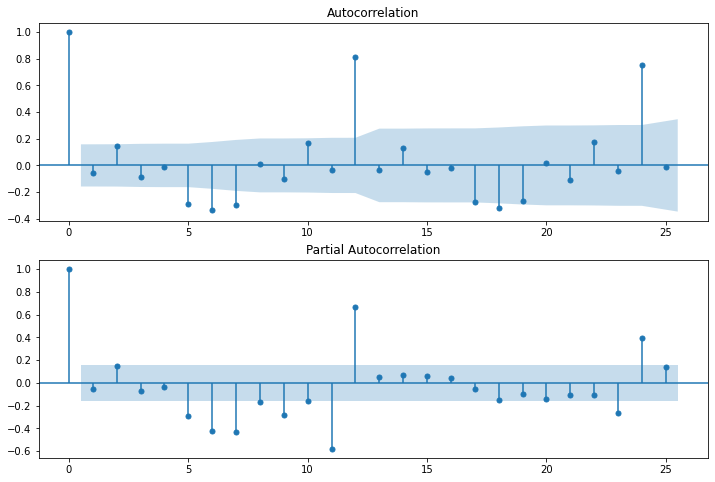

In [32]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(stat_df2['value'].values.squeeze(), lags=25, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(stat_df2['value'], lags=25, ax=ax2)

Подбор (d,p,q) для модели ARIMA: https://edu.mmcs.sfedu.ru/pluginfile.php/24419/mod_resource/content/2/14%20%D0%9F%D1%80%D0%BE%D0%B3%D0%BD%D0%BE%D0%B7%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5%20%D0%B2%D1%80%D0%B5%D0%BC%D0%B5%D0%BD%D0%BD%D1%8B%D1%85%20%D1%80%D1%8F%D0%B4%D0%BE%D0%B2.pdf

In [131]:
data_model = new_df['value'].dropna()

In [132]:
data_model = data_model.reset_index(drop=True)

In [133]:
data_model_test = data_model.iloc[:140]

In [134]:
data_model_test

0      5.16
1      6.84
2      5.61
3      6.20
4      5.58
       ... 
135    2.90
136    2.50
137    2.90
138    3.50
139    4.40
Name: value, Length: 140, dtype: float64

In [135]:
model = sm.tsa.ARIMA(data_model_test, order=(2,1,1)).fit(full_output=False, disp=0)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.AR

In [136]:
print(model.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.value   No. Observations:                  139
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -219.101
Method:                       css-mle   S.D. of innovations              1.157
Date:                Sat, 26 Nov 2022   AIC                            448.202
Time:                        13:29:28   BIC                            462.874
Sample:                             1   HQIC                           454.164
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0077        nan        nan        nan         nan         nan
ar.L1.D.value    -0.9178        nan        nan        nan         nan         nan
ar.L2.D.value     0.0822        nan     

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:1521: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))


In [137]:
q_test = sm.tsa.stattools.acf(model.resid, qstat=True)
print(pd.DataFrame({'Q-stat':q_test[1], 'p-value':q_test[2]}))

        Q-stat       p-value
0     0.000370  9.846444e-01
1     0.010157  9.949346e-01
2     0.836808  8.406442e-01
3     4.518650  3.403418e-01
4     6.386972  2.703642e-01
5    48.339632  1.010642e-08
6    50.635400  1.083665e-08
7    53.153574  1.007115e-08
8    53.396155  2.458453e-08
9    53.495657  6.022954e-08
10   53.664360  1.358966e-07
11  148.132777  1.355856e-25
12  148.425007  4.278334e-25
13  148.442632  1.472304e-24
14  150.150902  2.251631e-24
15  154.212268  1.151216e-24
16  155.769523  1.807649e-24
17  195.317990  8.631999e-32
18  197.060552  1.307106e-31
19  199.006853  1.768876e-31
20  199.071364  5.517370e-31
21  199.364478  1.514792e-30
22  199.414091  4.535694e-30
23  287.231389  6.178759e-47
24  287.667233  1.773923e-46
25  287.841340  5.632538e-46
26  288.800870  1.225112e-45
27  291.748560  1.059916e-45
28  293.083124  1.889990e-45
29  327.915320  7.914531e-52
30  329.719827  1.162226e-51
31  331.343421  1.831681e-51
32  331.689826  5.093375e-51
33  332.079923

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:657: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


In [140]:
pred = model.predict(140,165, typ='levels')

<AxesSubplot:>

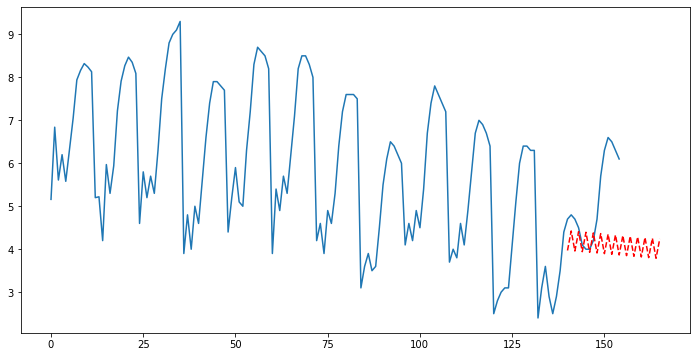

In [141]:
data_model.plot(figsize=(12,6))
pred.plot(style='r--')